### Importing Packages

In [11]:
import numpy as np                     
#import dtale                                       # Auto EDA library
#import sweetviz as sv                              # Auto EDA library
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
#pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

from pandas_profiling import ProfileReport  #for auto EDA report

# For Random seed values
from random import randint

import warnings
warnings.filterwarnings('ignore')  

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

# Install and update plotly using this command to the latest version (higher than version 4.0.0)

#!pip install plotly --upgrade
import plotly.graph_objs as go

In [2]:
df_train = pd.read_csv('voice_train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [12]:
print('Data Shape',df_train.shape)

Data Shape (2851, 22)


From the above we could observe there are no **missing values** present

- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **2851 samples (rows)** and **22 columns** in the dataframe.
  
  - There are **21 columns** with a **numeric** datatype and **1 column** with an **object** datatype &
  
  - There are **0 missing** values in the data.

In [13]:
print('Describe feature length', len(df_train.describe().columns))
df_train.describe()

Describe feature length 21


Id     meanfreq           sd       median          Q25  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean   1591.565416     0.180923     0.057143     0.185722     0.140349   
std     909.939169     0.029796     0.016588     0.036175     0.048628   
min       1.000000     0.039363     0.018363     0.010975     0.000229   
25%     808.500000     0.163739     0.042082     0.169726     0.111139   
50%    1590.000000     0.184848     0.059151     0.190067     0.140229   
75%    2382.500000     0.199061     0.066891     0.210650     0.175690   
max    3167.000000     0.251124     0.115273     0.261224     0.247347   

               Q75          IQR         skew         kurt       sp.ent  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.224730     0.084381     3.118469    35.808329     0.895312   
std       0.023509     0.042728     4.163727   131.430900     0.044795   
min       0.042946     0.014558     0.141735     2.068455     0.738651   
25%       0.208756     0.042663     1.638410     5.604497     0.862190   
50%       0.225729     0.094235     2.183320     8.255809     0.901840   
75%       0.243700     0.114208     2.932962    13.649354     0.928727   
max       0.273469     0.252225    34.725453  1309.612887     0.981997   

               sfm         mode     centroid      meanfun       minfun  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.408473     0.165481     0.180923     0.142891     0.036834   
std       0.176880     0.076918     0.029796     0.032191     0.019182   
min       0.036876     0.000000     0.039363     0.055565     0.009775   
25%       0.259191     0.118100     0.163739     0.117578     0.018223   
50%       0.396548     0.186667     0.184848     0.140678     0.046921   
75%       0.533495     0.221341     0.199061     0.169593     0.047904   
max       0.842936     0.280000     0.251124     0.237636     0.204082   

            maxfun      meandom       mindom       maxdom      dfrange  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      0.258968     0.833608     0.052634     5.075745     5.023111   
std       0.029806     0.525565     0.062982     3.526201     3.525193   
min       0.108696     0.007812     0.004883     0.007812     0.000000   
25%       0.253968     0.423799     0.007812     2.207031     2.183594   
50%       0.271186     0.767578     0.023438     4.992188     4.968750   
75%       0.277457     1.180411     0.070312     7.078125     7.042969   
max       0.279114     2.957682     0.458984    21.867188    21.843750   

           modindx  
count  2851.000000  
mean      0.173933  
std       0.119463  
min       0.000000  
25%       0.099591  
50%       0.139159  
75%       0.209525  
max       0.932374

### Numerical data distribution 

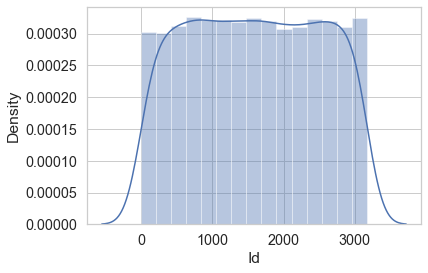

Mean: 1591.5654156436337 is greater then median: 1590.0, hence Id is Positively skewed
-------------------------------


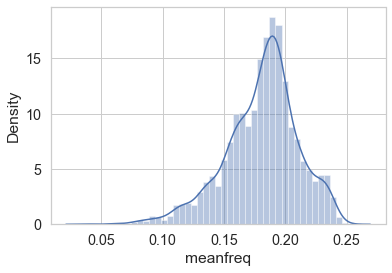

Mean: 0.18092292831161028 is less then median: 0.1848482965, hence meanfreq is Negatively skewed
-------------------------------


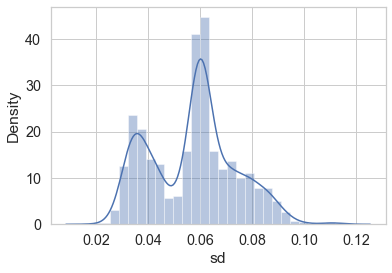

Mean: 0.0571432435251526 is less then median: 0.05915092356, hence sd is Negatively skewed
-------------------------------


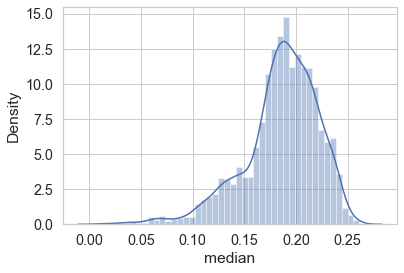

Mean: 0.18572174571495254 is less then median: 0.1900672646, hence median is Negatively skewed
-------------------------------


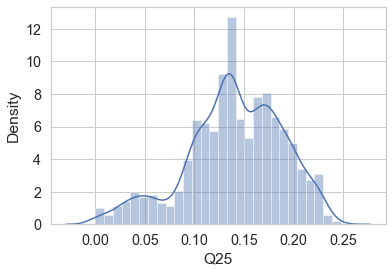

Mean: 0.1403485254853951 is greater then median: 0.1402291326, hence Q25 is Positively skewed
-------------------------------


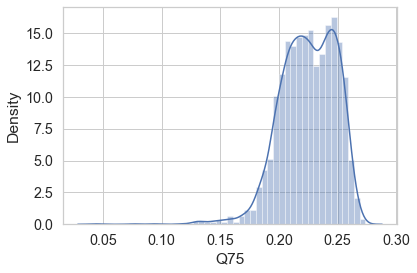

Mean: 0.2247299121541145 is less then median: 0.225728988, hence Q75 is Negatively skewed
-------------------------------


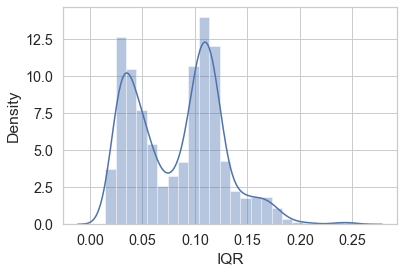

Mean: 0.08438138666993328 is less then median: 0.09423510467, hence IQR is Negatively skewed
-------------------------------


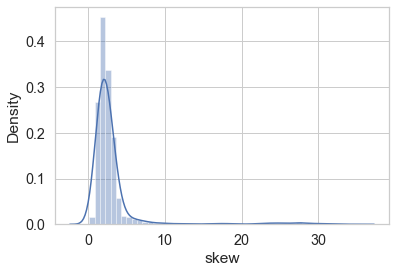

Mean: 3.1184694086393527 is greater then median: 2.183319689, hence skew is Positively skewed
-------------------------------


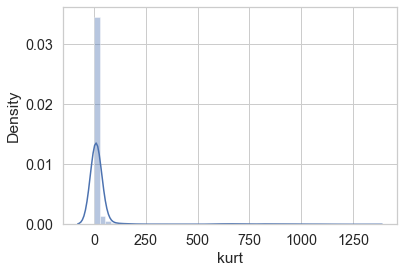

Mean: 35.80832872074009 is greater then median: 8.255808621, hence kurt is Positively skewed
-------------------------------


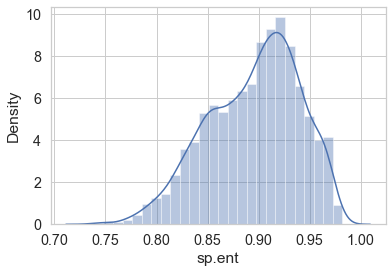

Mean: 0.8953116599366889 is less then median: 0.901839654, hence sp.ent is Negatively skewed
-------------------------------


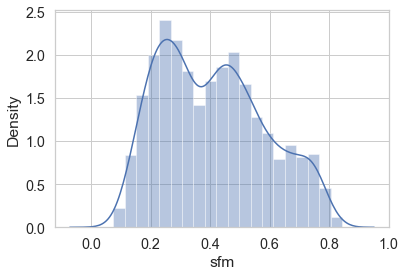

Mean: 0.4084732504820092 is greater then median: 0.3965482665, hence sfm is Positively skewed
-------------------------------


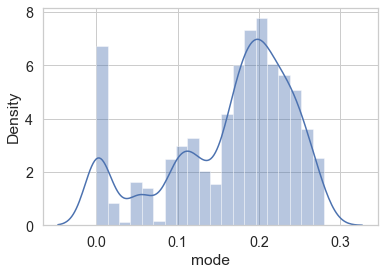

Mean: 0.1654806495622737 is less then median: 0.1866666667, hence mode is Negatively skewed
-------------------------------


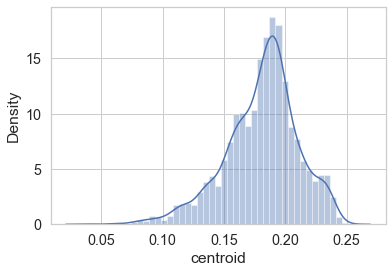

Mean: 0.18092292831161028 is less then median: 0.1848482965, hence centroid is Negatively skewed
-------------------------------


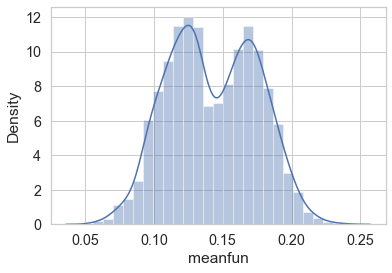

Mean: 0.142890947209688 is greater then median: 0.1406781346, hence meanfun is Positively skewed
-------------------------------


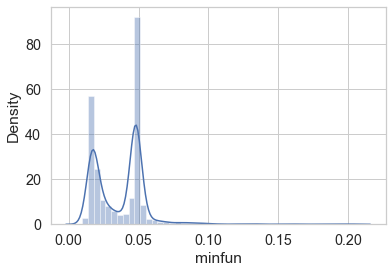

Mean: 0.036834313343944824 is less then median: 0.04692082111, hence minfun is Negatively skewed
-------------------------------


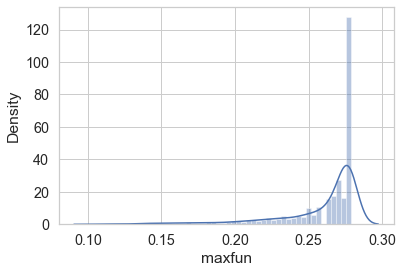

Mean: 0.25896759854195117 is less then median: 0.2711864407, hence maxfun is Negatively skewed
-------------------------------


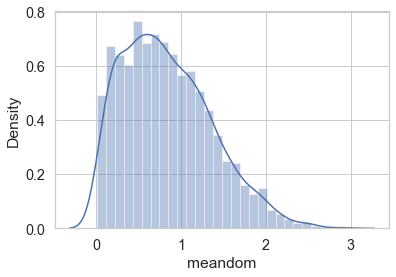

Mean: 0.8336078308971623 is greater then median: 0.767578125, hence meandom is Positively skewed
-------------------------------


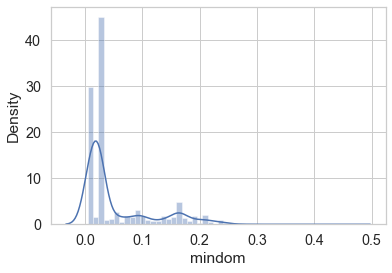

Mean: 0.05263389285010173 is greater then median: 0.0234375, hence mindom is Positively skewed
-------------------------------


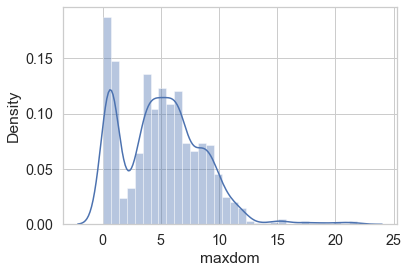

Mean: 5.075745078493164 is greater then median: 4.9921875, hence maxdom is Positively skewed
-------------------------------


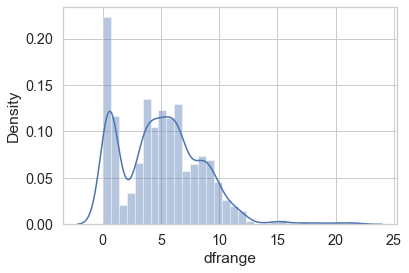

Mean: 5.023111185640832 is greater then median: 4.96875, hence dfrange is Positively skewed
-------------------------------


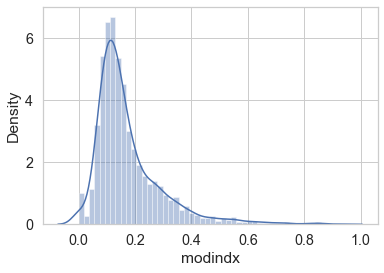

Mean: 0.17393347918735905 is greater then median: 0.1391590013, hence modindx is Positively skewed
-------------------------------


In [14]:
for col in df_train.describe().columns:
    if df_train[col].mean() > df_train[col].median():
        ax=sns.distplot(df_train[col])
        plt.show()
        print('Mean: {} is greater then median: {}, hence {} is Positively skewed'.format(df_train[col].mean(),df_train[col].median(),col))
        print('-------------------------------')
    elif df_train[col].mean() < df_train[col].median():
        ax=sns.distplot(df_train[col])
        plt.show()
        print('Mean: {} is less then median: {}, hence {} is Negatively skewed'.format(df_train[col].mean(),df_train[col].median(),col))
        print('-------------------------------')
    else :
        ax=sns.distplot(df_train[col])
        plt.show()
        print('Mean: {} is equals  median: {}, hence {} is Normally distributed'.format(df_train[col].mean(),df_train[col].median(),col))
        
     

### Categorical data distribution 

In [15]:
cat_columns =[]
for col in df_train.columns.values:
    if (df_train[col].dtype=='object'):
        cat_columns.append(col)

print('Total Categorical Features : {}'.format(len(cat_columns)))        
print('Categorical Features : {}'.format(cat_columns))

Total Categorical Features : 1
Categorical Features : ['label']


In [16]:
#check number of classes in each categorical feature 

for col in cat_columns:
    print('No of classes in {} :  {}'.format(col,df_train[col].nunique()))

No of classes in label :  2


In [19]:
colors =[]
for i in range(14):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [20]:
colors

['#AECA48',
 '#E65C65',
 '#9A9B44',
 '#482A65',
 '#8E419F',
 '#1FB791',
 '#918C10',
 '#121748',
 '#600D99',
 '#949CA7',
 '#CB9C8C',
 '#9437A9',
 '#7FFEB2',
 '#732FCE']

Which category has the highest proportion in the label column in train data?

In [5]:
df_train.label.value_counts()

female    1432
male      1419
Name: label, dtype: int64

How many duplicate rows are there in the train data before preprocessing?

In [6]:
df_train[df_train.duplicated()]

Empty DataFrame
Columns: [Id, meanfreq, sd, median, Q25, Q75, IQR, skew, kurt, sp.ent, sfm, mode, centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx, label]
Index: []

[0 rows x 22 columns]

How many missing cells are there in the train data before preprocessing?

In [7]:
df_train.head()

Id  meanfreq        sd    median       Q25       Q75       IQR      skew  \
0   765  0.162337  0.058206  0.174065  0.100225  0.196512  0.096287  2.127226   
1  3071  0.161653  0.057435  0.170138  0.157522  0.182929  0.025407  6.968850   
2  1546  0.165290  0.061891  0.135071  0.118468  0.225176  0.106708  2.631865   
3   410  0.188100  0.055735  0.206028  0.130493  0.229470  0.098977  1.538406   
4  2689  0.187497  0.044226  0.190071  0.156800  0.215435  0.058635  1.653083   

        kurt    sp.ent  ...  centroid   meanfun    minfun    maxfun   meandom  \
0   7.815129  0.921533  ...  0.162337  0.095852  0.016754  0.235294  0.406033   
1  60.968047  0.870409  ...  0.161653  0.163486  0.015601  0.204082  0.595161   
2  12.629116  0.918897  ...  0.165290  0.120050  0.035088  0.222222  0.458577   
3   5.145753  0.914325  ...  0.188100  0.108470  0.021305  0.145455  0.493229   
4   5.839465  0.907477  ...  0.187497  0.154529  0.048338  0.279070  1.113502   

     mindom    maxdom   dfrange   modindx   label  
0  0.046875  3.484375  3.437500  0.155348    male  
1  0.170898  3.979492  3.808594  0.209073  female  
2  0.087891  1.015625  0.927734  0.459834    male  
3  0.125000  4.734375  4.609375  0.105202    male  
4  0.023438  8.765625  8.742188  0.103095  female  

[5 rows x 22 columns]

In [8]:
df_train[df_train['meanfreq']==0]

Empty DataFrame
Columns: [Id, meanfreq, sd, median, Q25, Q75, IQR, skew, kurt, sp.ent, sfm, mode, centroid, meanfun, minfun, maxfun, meandom, mindom, maxdom, dfrange, modindx, label]
Index: []

[0 rows x 22 columns]

In [9]:
column_list = df_train.columns

In [10]:
for col in 

SyntaxError: invalid syntax (<ipython-input-10-34de47defc6c>, line 1)

Are there outliers in the meanfreq column of the train data before preprocessing?

In [ ]:
sns.boxplot(df_train.meanfreq)

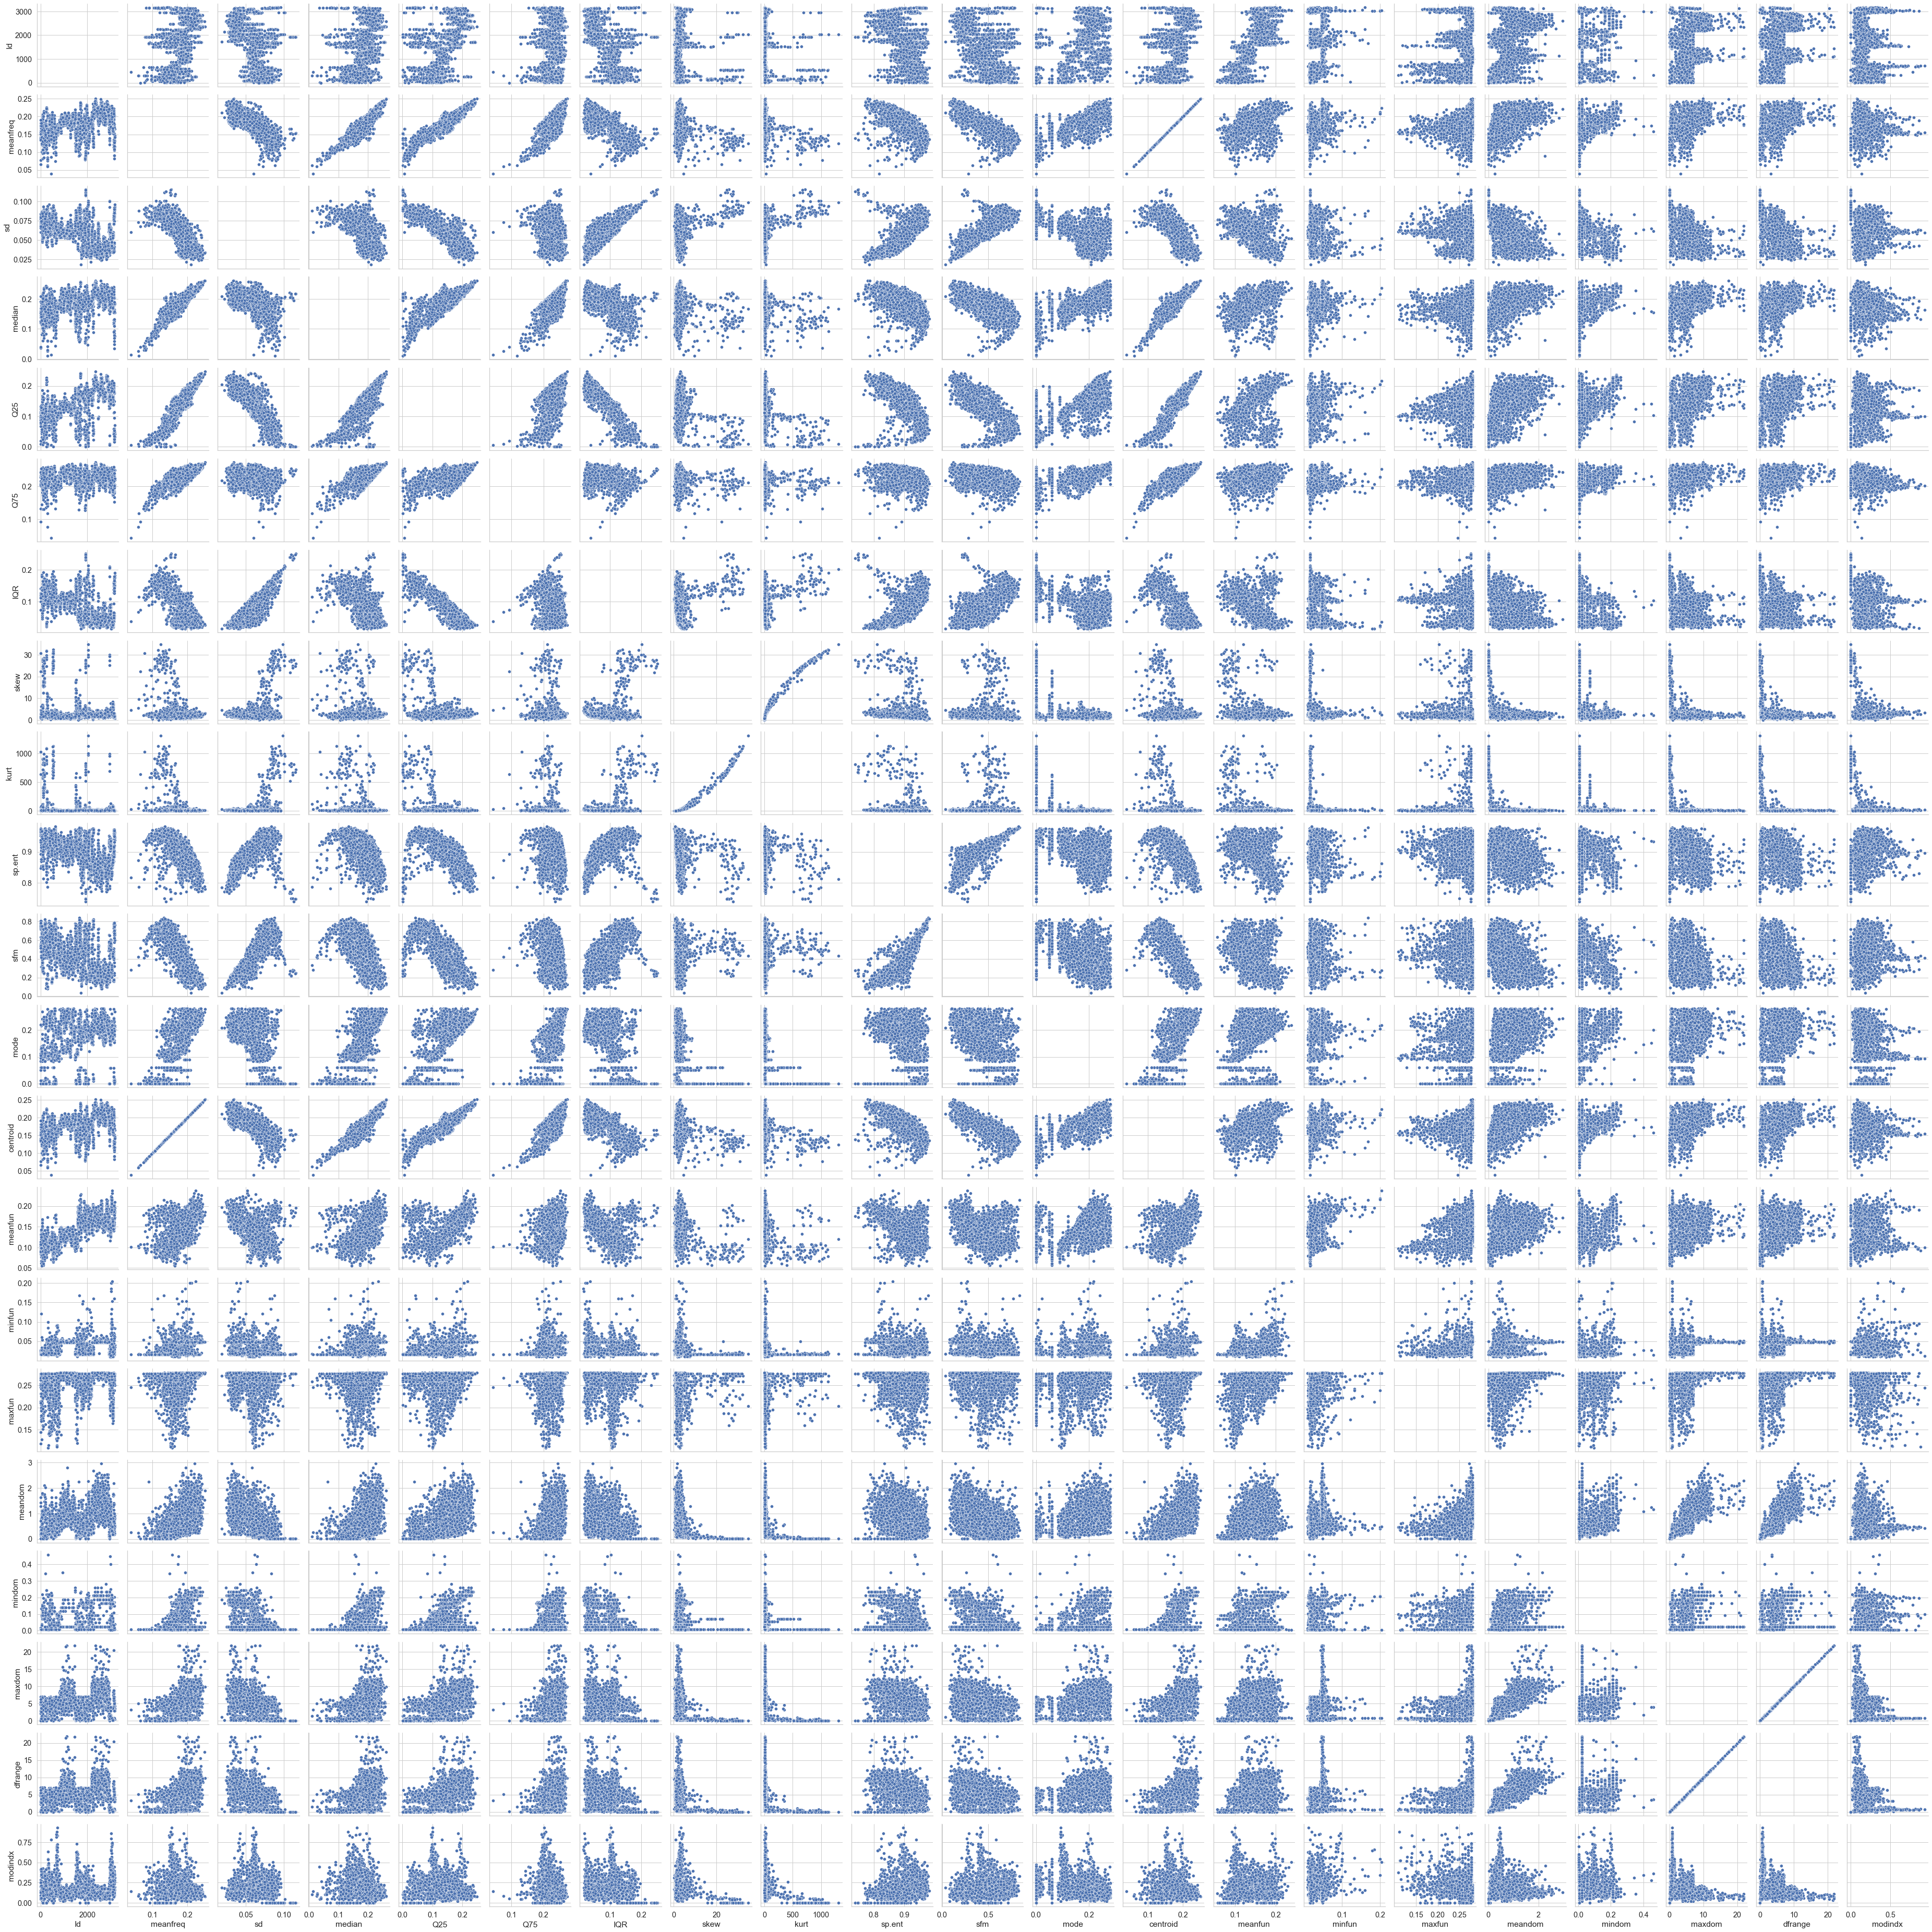

In [24]:
sns.pairplot(df_train,kind='label')